In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_pickle('dataframe_dropped.pkl')
df.sample(1)

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-2,inertia_tensor-2-2,local_centroid-0,max_intensity-0,max_intensity-1,...,hc_foci_d_nearest_neighbor_mean,hc_foci_d_nearest_neighbor_variance,hc_foci_ratio_nearest_neighbor_volume_mean,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,full_label,condition
750,95986.0,1.0,0.407565,6.958894,21.234634,9.974434,612.999711,6.126524,255.0,255.0,...,1.221206,0.452199,12.909542,86.514448,0.861329,0.475928,0.041016,0.022663,JC_Plate1_mcp_high_23_nucleus_2,mcp_high


In [9]:
from sklearn.preprocessing import StandardScaler

conditions = df['full_label']

columns = [col for col in df.columns if ('full_label' not in col and 'condition' not in col)]

scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[columns]), columns=columns)

In [10]:
from sklearn.manifold import TSNE

# Create and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_representation = tsne.fit_transform(df_normalized)

# Create DataFrame from t-SNE-transformed data
transformed_data = pd.DataFrame(tsne_representation, columns=['Component 1', 'Component 2'])


In [12]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), conditions.reset_index(drop=True)], axis=1, ignore_index=False)
transformed_data_labeled

,Component 1,Component 2,full_label
0,5.706404,12.718962,JC_Plate1_MCP_low_84_nucleus_1
1,12.658496,42.347073,JC_Plate1_MCP_low_84_nucleus_2
2,-19.455572,-27.706968,JC_Plate1_MCP_low_86_nucleus_1
3,8.552079,9.417660,JC_Plate1_MCP_low_86_nucleus_2
4,9.919410,6.351616,JC_Plate1_MCP_low_86_nucleus_3
...,...,...,...
2133,-1.563648,23.877785,JC_Plate1_tnfa_high_79_nucleus_4
2134,-0.675328,-58.335407,JC_Plate1_tnfa_high_87_nucleus_1
2135,-5.068902,-54.191544,JC_Plate1_tnfa_high_87_nucleus_2
2136,11.089400,4.732264,JC_Plate1_tnfa_high_87_nucleus_3


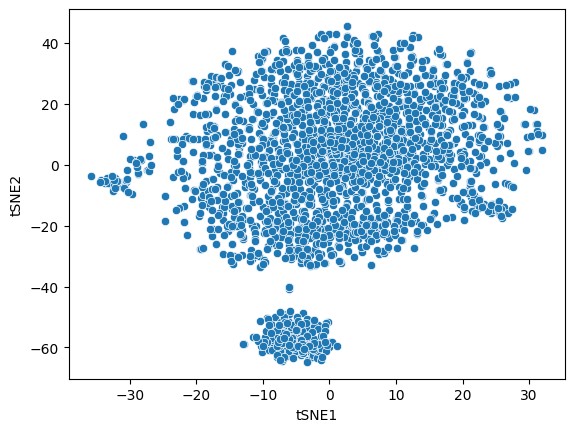

In [13]:
sns.scatterplot(data = transformed_data_labeled, x = 'Component 1', y = 'Component 2')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()

In [18]:
df_cluster_trans = transformed_data_labeled[transformed_data_labeled['Component 2'] < -40]
df_cluster_trans.describe()

,Component 1,Component 2
count,181.000000,181.000000
mean,-5.338828,-56.559208
std,2.847846,4.495901
min,-12.938437,-64.758026
25%,-7.165284,-59.648170
50%,-5.298306,-57.378849
75%,-3.306442,-53.318096
max,1.189546,-40.149834


In [23]:
labels = set(df_cluster_trans.full_label)
labels

{'JC_Plate1_Control_100_nucleus_2',
 'JC_Plate1_Control_101_nucleus_1',
 'JC_Plate1_Control_106_nucleus_2',
 'JC_Plate1_Control_107_nucleus_1',
 'JC_Plate1_Control_108_nucleus_2',
 'JC_Plate1_Control_109_nucleus_1',
 'JC_Plate1_Control_110_nucleus_1',
 'JC_Plate1_Control_1_nucleus_2',
 'JC_Plate1_Control_27_nucleus_2',
 'JC_Plate1_Control_33_nucleus_1',
 'JC_Plate1_Control_38_nucleus_2',
 'JC_Plate1_Control_39_nucleus_3',
 'JC_Plate1_Control_40_nucleus_2',
 'JC_Plate1_Control_42_nucleus_1',
 'JC_Plate1_Control_42_nucleus_2',
 'JC_Plate1_Control_42_nucleus_3',
 'JC_Plate1_Control_44_nucleus_2',
 'JC_Plate1_Control_46_nucleus_1',
 'JC_Plate1_Control_47_nucleus_1',
 'JC_Plate1_Control_52_nucleus_2',
 'JC_Plate1_Control_52_nucleus_3',
 'JC_Plate1_Control_52_nucleus_4',
 'JC_Plate1_Control_53_nucleus_2',
 'JC_Plate1_Control_54_nucleus_2',
 'JC_Plate1_Control_55_nucleus_2',
 'JC_Plate1_Control_56_nucleus_1',
 'JC_Plate1_Control_56_nucleus_2',
 'JC_Plate1_Control_58_nucleus_1',
 'JC_Plate1_Co

In [31]:
df_cluster = df[df['full_label'].isin(labels)]
df_cluster.to_pickle('df_cluster.pkl')

In [4]:
'''
df_cluster = pd.read_pickle('df_cluster.pkl')
labels = set(df_cluster.full_label)
labels
'''

{'JC_Plate1_Control_100_nucleus_2',
 'JC_Plate1_Control_101_nucleus_1',
 'JC_Plate1_Control_106_nucleus_2',
 'JC_Plate1_Control_107_nucleus_1',
 'JC_Plate1_Control_108_nucleus_2',
 'JC_Plate1_Control_109_nucleus_1',
 'JC_Plate1_Control_110_nucleus_1',
 'JC_Plate1_Control_1_nucleus_2',
 'JC_Plate1_Control_27_nucleus_2',
 'JC_Plate1_Control_33_nucleus_1',
 'JC_Plate1_Control_38_nucleus_2',
 'JC_Plate1_Control_39_nucleus_3',
 'JC_Plate1_Control_40_nucleus_2',
 'JC_Plate1_Control_42_nucleus_1',
 'JC_Plate1_Control_42_nucleus_2',
 'JC_Plate1_Control_42_nucleus_3',
 'JC_Plate1_Control_44_nucleus_2',
 'JC_Plate1_Control_46_nucleus_1',
 'JC_Plate1_Control_47_nucleus_1',
 'JC_Plate1_Control_52_nucleus_2',
 'JC_Plate1_Control_52_nucleus_3',
 'JC_Plate1_Control_52_nucleus_4',
 'JC_Plate1_Control_53_nucleus_2',
 'JC_Plate1_Control_54_nucleus_2',
 'JC_Plate1_Control_55_nucleus_2',
 'JC_Plate1_Control_56_nucleus_1',
 'JC_Plate1_Control_56_nucleus_2',
 'JC_Plate1_Control_58_nucleus_1',
 'JC_Plate1_Co

In [5]:
'''
df_images = pd.read_pickle('dataframe_images.pkl')
df_images.reset_index(drop=False, inplace=True)
df_cluster_img = df_images[df_images['full_label'].isin(labels)]
df_cluster_img.to_pickle('df_cluster_img.pkl')
'''

In [6]:
#del df_images

<h4>Having a look at features of subcluster</h4>

In [2]:
import pandas as pd

In [2]:
df_sub = pd.read_pickle('df_cluster.pkl')
labels = set(df_sub.full_label)

In [3]:
df = pd.read_pickle('dataframe_dropped.pkl')
df = df.drop(columns='condition')

In [4]:
df['condition'] = df['full_label'].apply(lambda x: 'cluster' if x in labels else 'main')

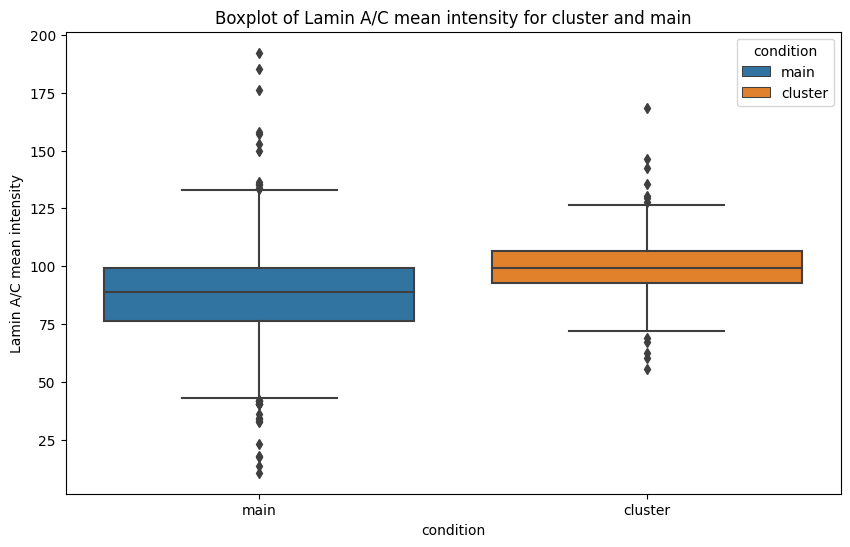

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='condition', y='mean_intensity-2', hue='condition', dodge=False)
plt.title('Boxplot of Lamin A/C mean intensity for cluster and main')
plt.ylabel('Lamin A/C mean intensity')
plt.show()

Text(0.5, 1.0, 'Class sizes in subcluster of global tSNE')

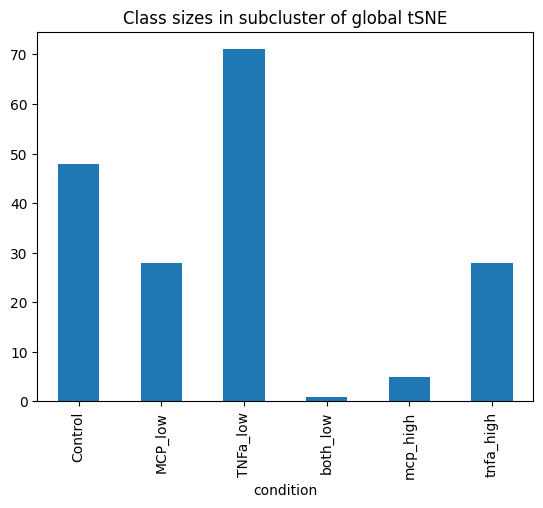

In [19]:
df_sub = pd.read_pickle('df_cluster.pkl')
df_sub.groupby(['condition'])['condition'].count().plot(kind='bar')
plt.title('Class sizes in subcluster of global tSNE')

This subcluster is not specific to a condition or batch -> no problem with that actually, just different cells

<h4>Analysis of subclusters of conditions</h4>

In [6]:
import pickle

with open('dfs_condition.pickle', 'rb') as handle:
    dfs = pickle.load(handle)

df = pd.read_pickle('dataframe_dropped.pkl')


In [7]:
control = dfs['Control']
tnfa_high = dfs['tnfa_high']
mcp_low = dfs['MCP_low']

In [8]:
control_clusters = set(control[control['Component 2'] < -10].full_label)
tnfa_high_cluster = set(tnfa_high[(tnfa_high['Component 2'] < -5) & (tnfa_high['Component 1'] < -7)].full_label)
mcp_low_cluster = set(mcp_low[mcp_low['Component 1'] < -7.5].full_label)

In [12]:
control = df[df['condition'] == 'Control']
tnfa_high = df[df['condition'] == 'tnfa_high']
mcp_low = df[df['condition'] == 'MCP_low']

In [108]:
control['condition'] = control['full_label'].apply(lambda x: 'cluster' if x in control_clusters else 'main')
tnfa_high['condition'] = tnfa_high['full_label'].apply(lambda x: 'cluster' if x in tnfa_high_cluster else 'main')
mcp_low['condition'] = mcp_low['full_label'].apply(lambda x: 'cluster' if x in mcp_low_cluster else 'main')

/tmp/ipykernel_6923/2210222047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control['condition'] = control['full_label'].apply(lambda x: 'cluster' if x in control_clusters else 'main')
/tmp/ipykernel_6923/2210222047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tnfa_high['condition'] = tnfa_high['full_label'].apply(lambda x: 'cluster' if x in tnfa_high_cluster else 'main')
/tmp/ipykernel_6923/2210222047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [109]:
print(control.shape, tnfa_high.shape, mcp_low.shape)

(260, 173) (308, 173) (259, 173)


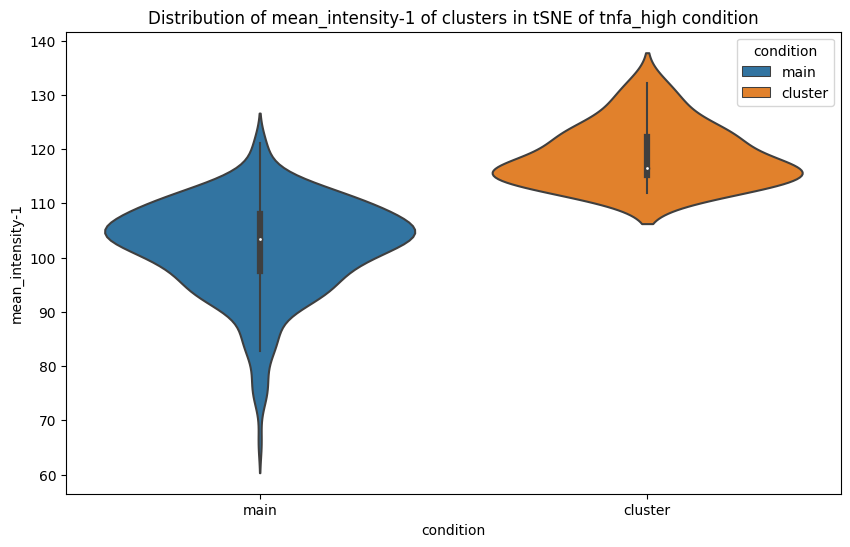

In [134]:
plt.figure(figsize=(10,6))
sns.violinplot(data=tnfa_high, x='condition', y='mean_intensity-1', hue='condition', dodge=False)
plt.title('Distribution of mean_intensity-1 of clusters in tSNE of tnfa_high condition')
plt.show()

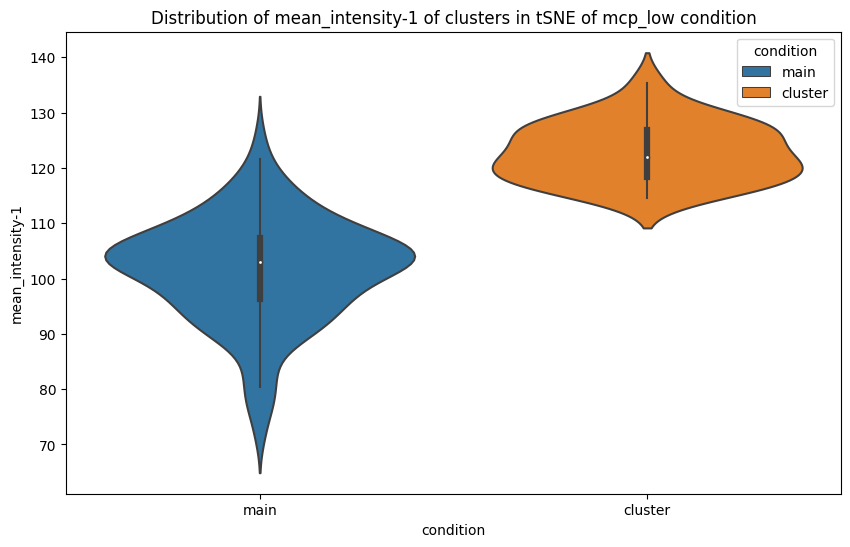

In [135]:
plt.figure(figsize=(10,6))
sns.violinplot(data=mcp_low, x='condition', y='mean_intensity-1', hue='condition', dodge=False)
plt.title('Distribution of mean_intensity-1 of clusters in tSNE of mcp_low condition')
plt.show()